In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#declare header files

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings # To suppress some warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('cancer patient data sets.csv')

#**EDA**(Explotory data analysis)




In [ ]:
df = df.drop(columns = ['Patient Id', 'index'])

In [ ]:
#check 'Column name','Total number of column' & data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [ ]:
#check (first five rows) data's from DataFrame

df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
round(df.describe().iloc[1:, ].T, 3).style.format(precision=2).background_gradient(axis=1)

,mean,std,min,25%,50%,75%,max
Age,37.17,12.01,14.00,27.75,36.00,45.00,73.00
Gender,1.40,0.49,1.00,1.00,1.00,2.00,2.00
Air Pollution,3.84,2.03,1.00,2.00,3.00,6.00,8.00
Alcohol use,4.56,2.62,1.00,2.00,5.00,7.00,8.00
Dust Allergy,5.17,1.98,1.00,4.00,6.00,7.00,8.00
OccuPational Hazards,4.84,2.11,1.00,3.00,5.00,7.00,8.00
Genetic Risk,4.58,2.13,1.00,2.00,5.00,7.00,7.00
chronic Lung Disease,4.38,1.85,1.00,3.00,4.00,6.00,7.00
Balanced Diet,4.49,2.14,1.00,2.00,4.00,7.00,7.00
Obesity,4.46,2.12,1.00,3.00,4.00,7.00,7.00


#**Data Preprocessing**

In [ ]:
df.isnull().sum().sum()   #missing value er nmbr return kore

0

In [ ]:
#check any duplicate data's present in the DataFrame
df.duplicated().sum()

848

In [ ]:
#Change cancer levels from Objective(str) to numeric values by Mapping

mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["Level"].replace(mapping, inplace=True)

#Display change of cancer level

df['Level'].unique()

array([0, 1, 2])

#**Data Visualization**

**3.1 Pie Chart**

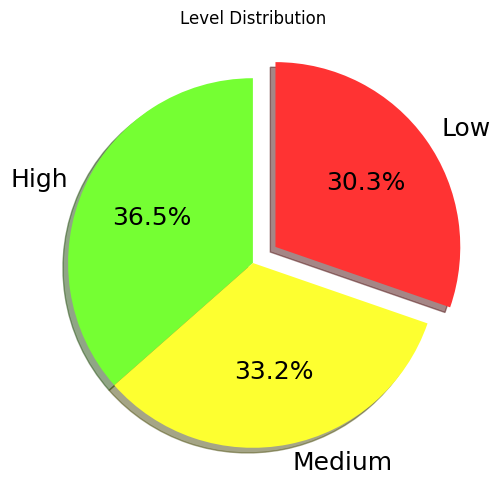

In [ ]:
#check risk level
plt.figure(figsize=(10, 6))
explode = (0, 0, 0.15)
plt.pie(df['Level'].value_counts(),
        labels=mapping.keys(),
        explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=['#75ff33', '#fdff30', '#ff3333'],
        textprops={'fontsize': 18})
plt.title('Level Distribution')
plt.show()

**3.2 Bar chart - Risk level vs Each parameters**

In [ ]:
#Each individual column(independent variables) influenced in target column(dependent variables)
# function for bar plotting
def occ_cht(col, df=df):
    return df.groupby(col)['Level'].value_counts(normalize=True).unstack().plot(kind='bar', title = (f'Lungs Disease Based on {col}'), figsize=(12,5))

<Axes: title={'center': 'Lungs Disease Based on Age'}, xlabel='Age'>

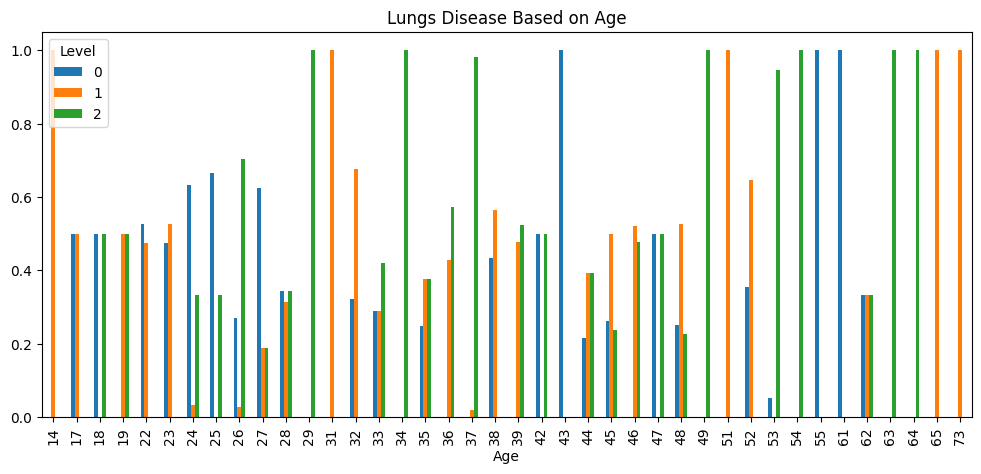

In [ ]:
occ_cht('Age')

<Axes: title={'center': 'Lungs Disease Based on Gender'}, xlabel='Gender'>

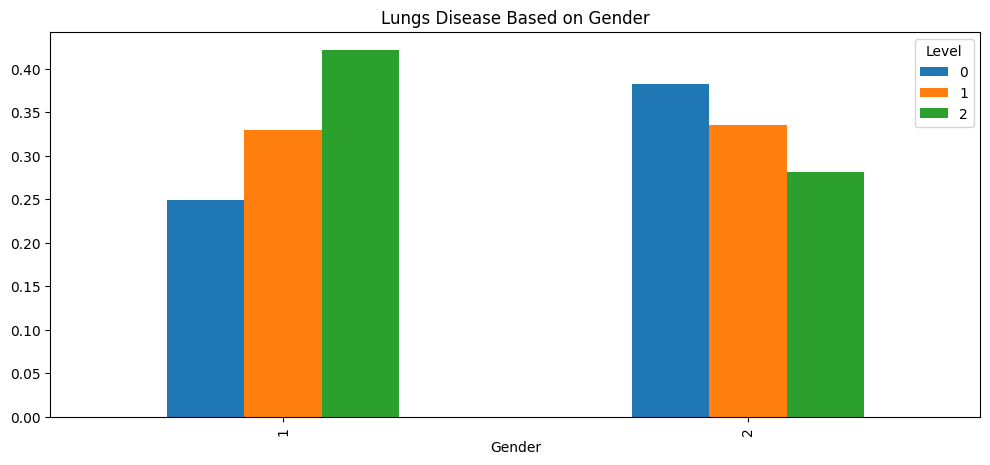

In [ ]:
occ_cht('Gender')

<Axes: title={'center': 'Lungs Disease Based on Air Pollution'}, xlabel='Air Pollution'>

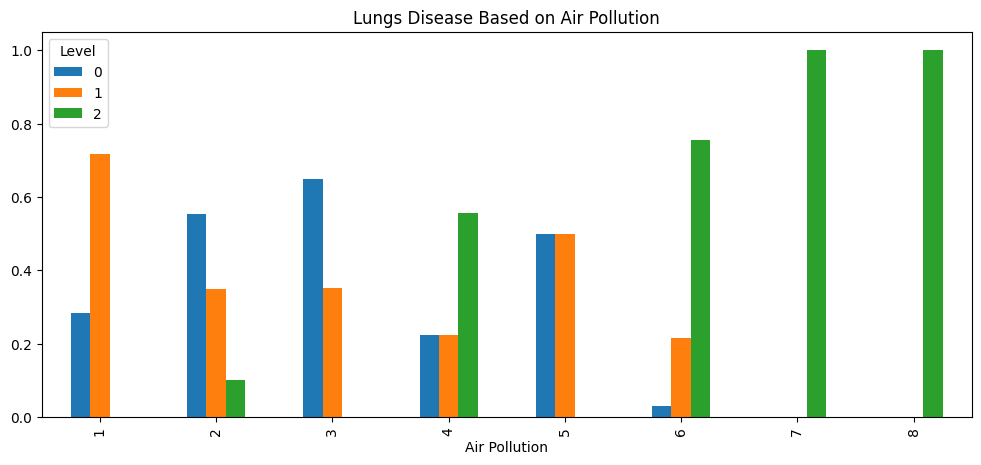

In [ ]:
occ_cht('Air Pollution')

<Axes: title={'center': 'Lungs Disease Based on Alcohol use'}, xlabel='Alcohol use'>

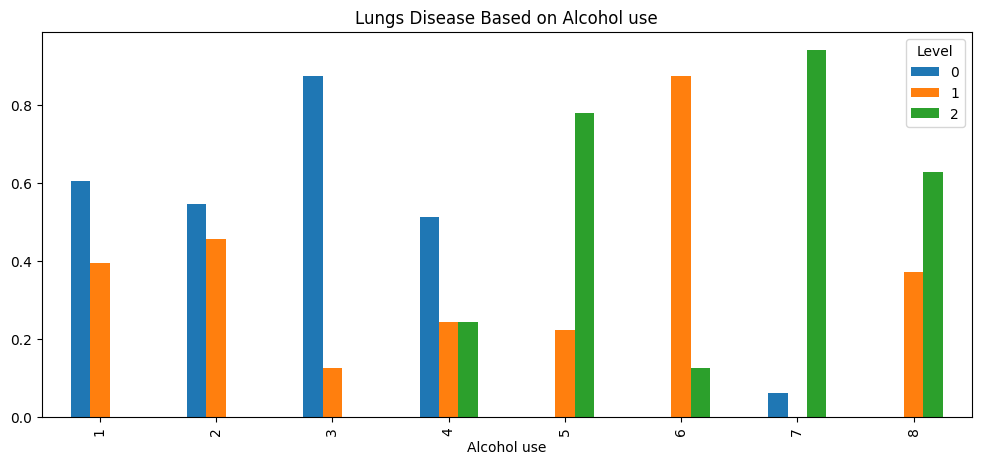

In [ ]:
occ_cht('Alcohol use')

<Axes: title={'center': 'Lungs Disease Based on Dust Allergy'}, xlabel='Dust Allergy'>

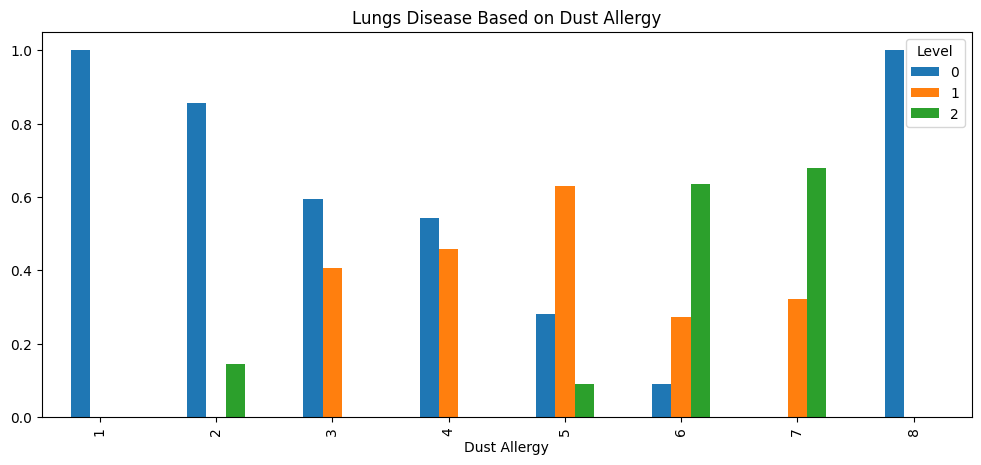

In [ ]:
occ_cht('Dust Allergy')

<Axes: title={'center': 'Lungs Disease Based on OccuPational Hazards'}, xlabel='OccuPational Hazards'>

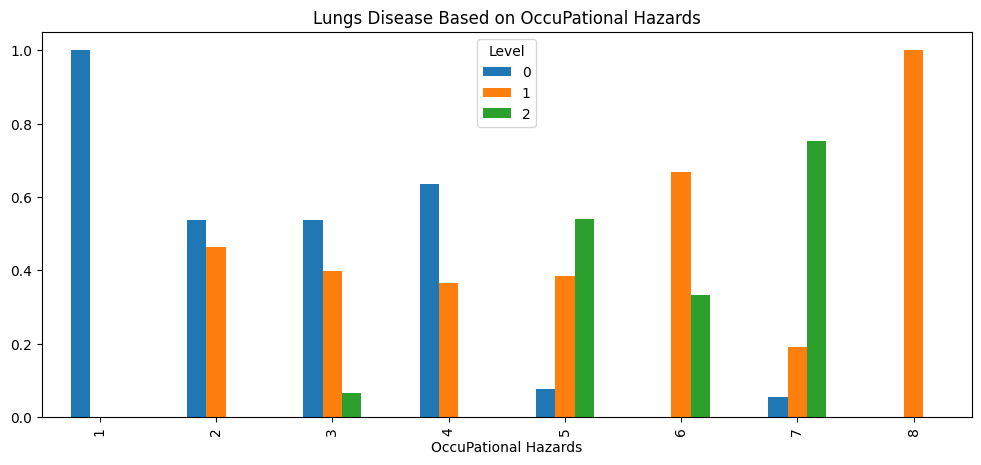

In [ ]:
occ_cht('OccuPational Hazards')

<Axes: title={'center': 'Lungs Disease Based on Genetic Risk'}, xlabel='Genetic Risk'>

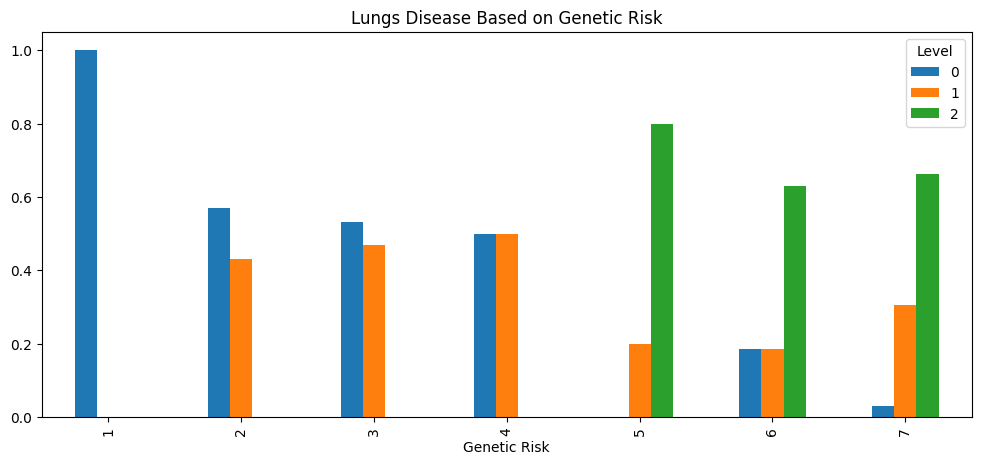

In [ ]:
occ_cht('Genetic Risk')

<Axes: title={'center': 'Lungs Disease Based on chronic Lung Disease'}, xlabel='chronic Lung Disease'>

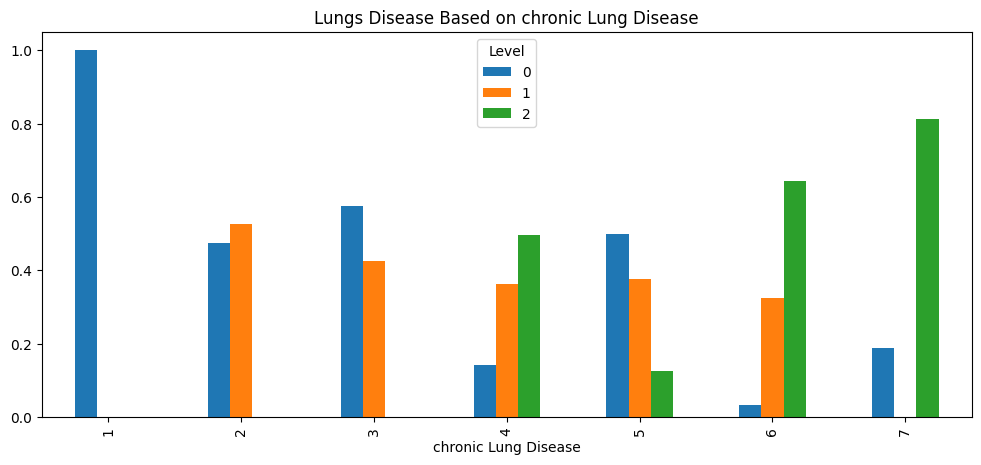

In [ ]:
occ_cht('chronic Lung Disease')

<Axes: title={'center': 'Lungs Disease Based on Balanced Diet'}, xlabel='Balanced Diet'>

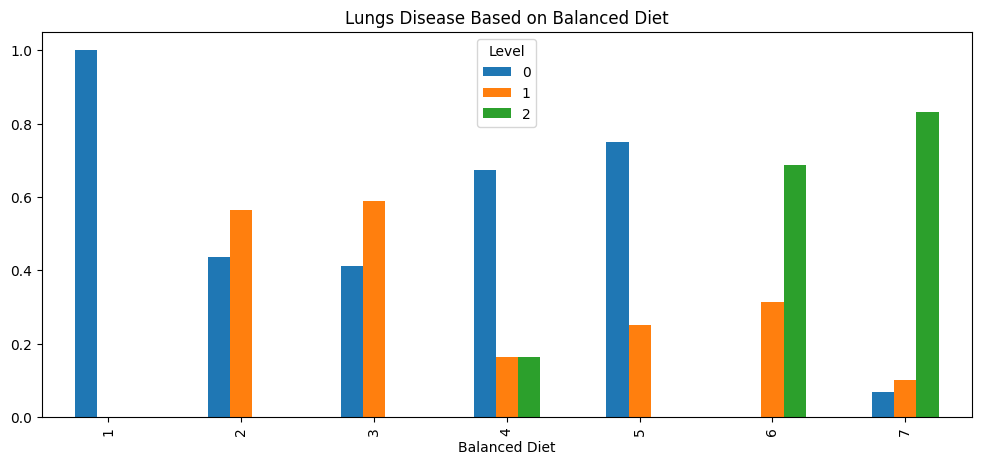

In [ ]:
occ_cht('Balanced Diet')

<Axes: title={'center': 'Lungs Disease Based on Obesity'}, xlabel='Obesity'>

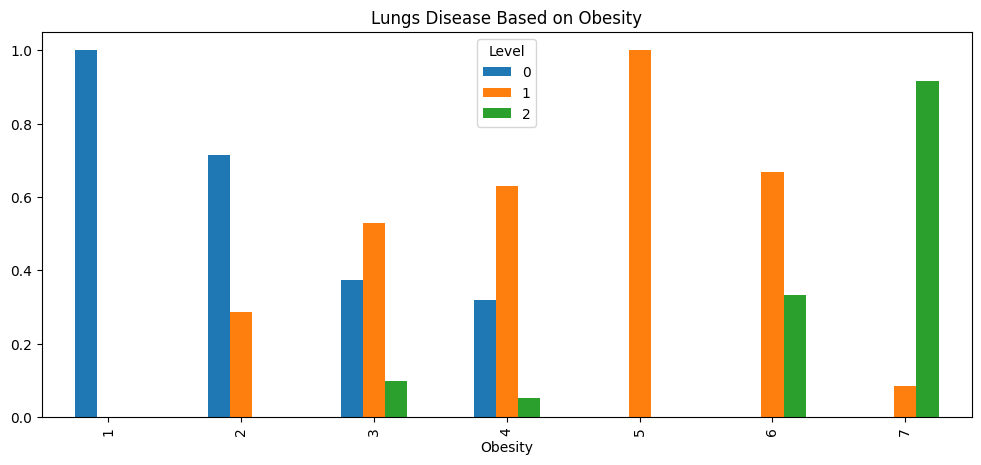

In [ ]:
occ_cht('Obesity')

<Axes: title={'center': 'Lungs Disease Based on Smoking'}, xlabel='Smoking'>

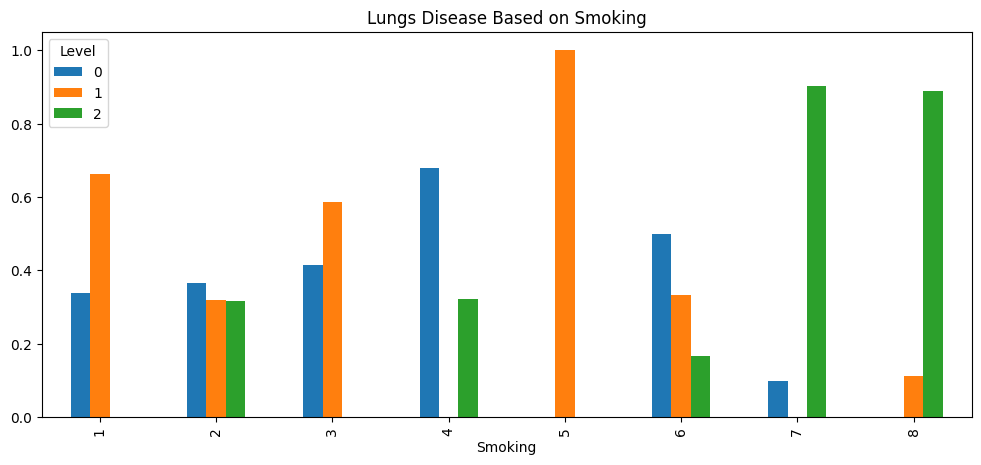

In [ ]:
occ_cht('Smoking')

<Axes: title={'center': 'Lungs Disease Based on Passive Smoker'}, xlabel='Passive Smoker'>

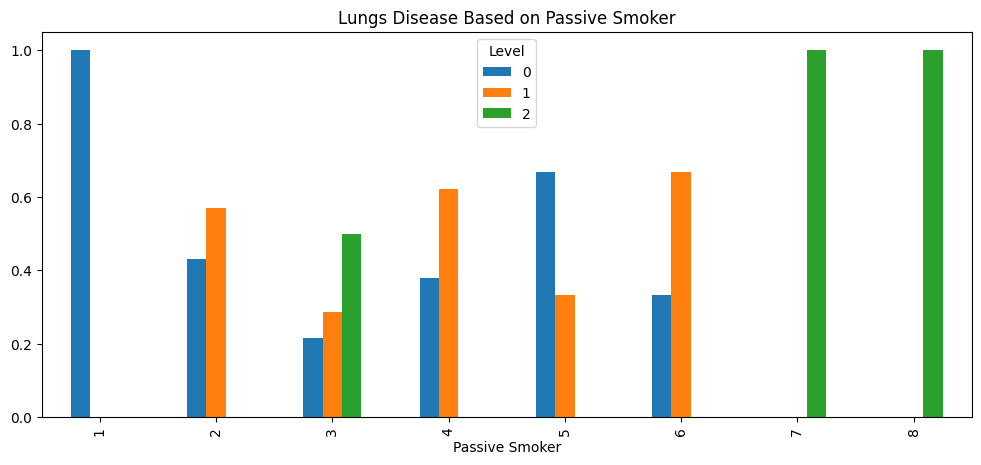

In [ ]:
occ_cht('Passive Smoker')

<Axes: title={'center': 'Lungs Disease Based on Chest Pain'}, xlabel='Chest Pain'>

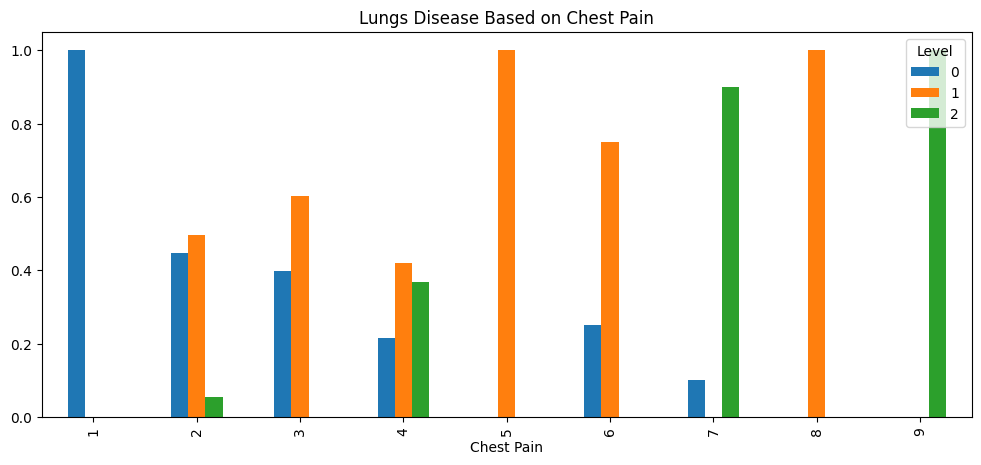

In [ ]:
occ_cht('Chest Pain')

<Axes: title={'center': 'Lungs Disease Based on Coughing of Blood'}, xlabel='Coughing of Blood'>

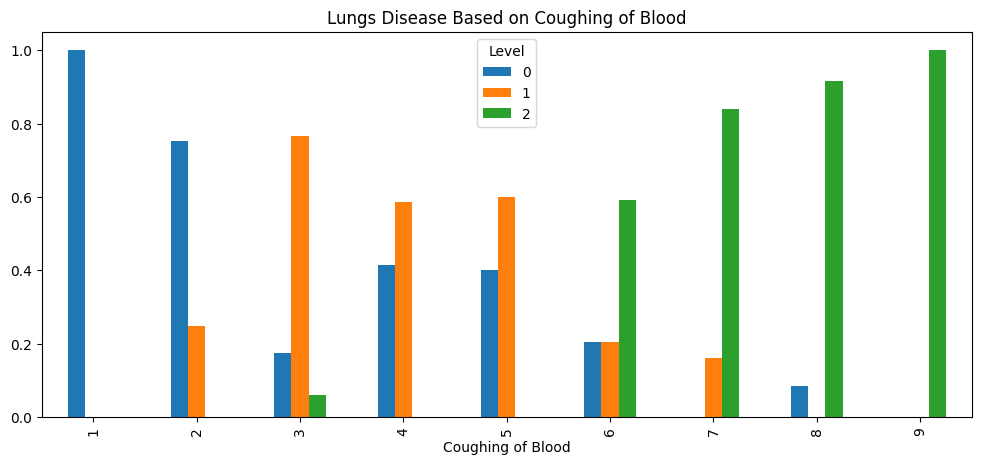

In [ ]:
occ_cht('Coughing of Blood')

<Axes: title={'center': 'Lungs Disease Based on Fatigue'}, xlabel='Fatigue'>

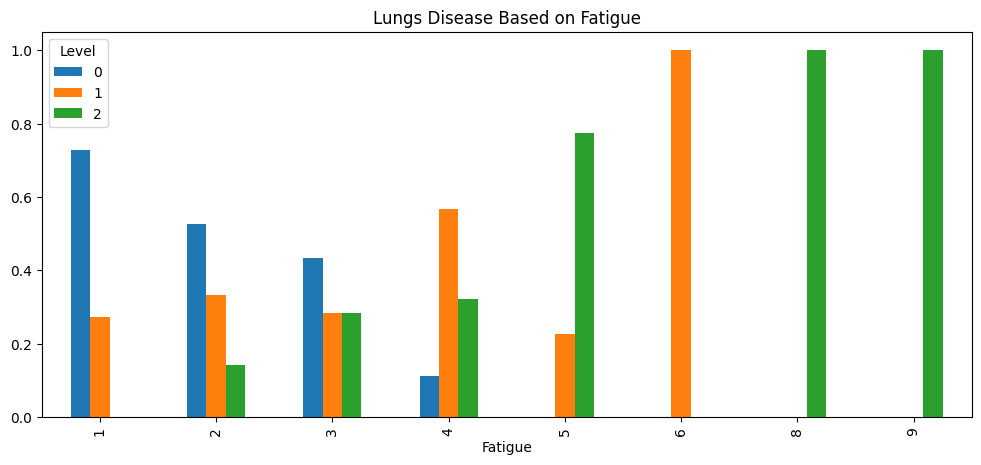

In [ ]:
occ_cht('Fatigue')

<Axes: title={'center': 'Lungs Disease Based on Weight Loss'}, xlabel='Weight Loss'>

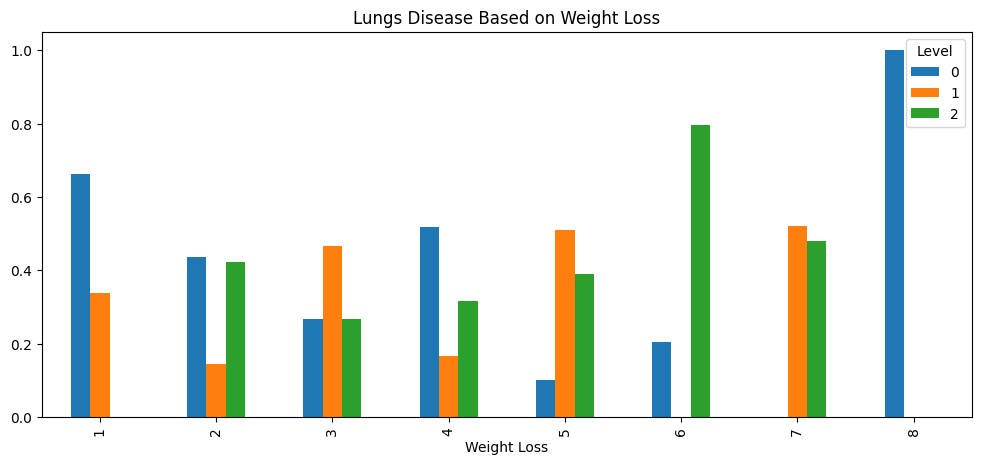

In [ ]:
occ_cht('Weight Loss')

<Axes: title={'center': 'Lungs Disease Based on Shortness of Breath'}, xlabel='Shortness of Breath'>

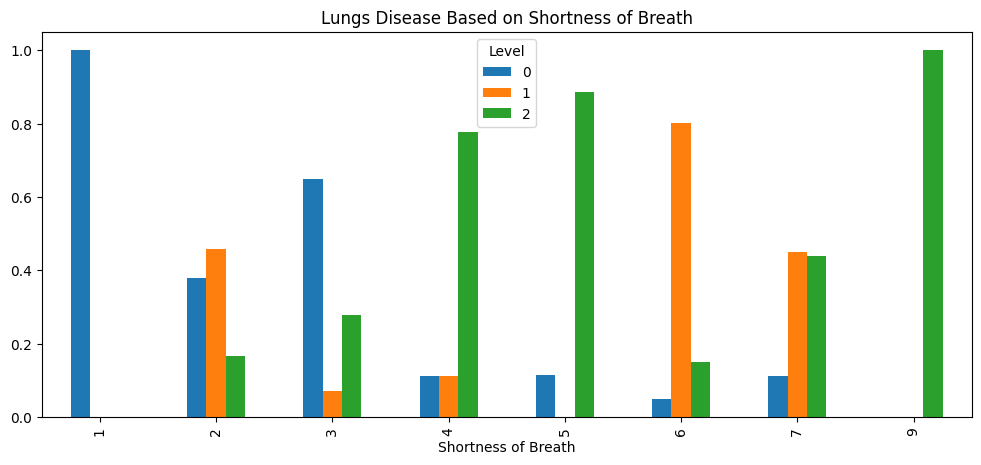

In [ ]:
occ_cht('Shortness of Breath')

<Axes: title={'center': 'Lungs Disease Based on Wheezing'}, xlabel='Wheezing'>

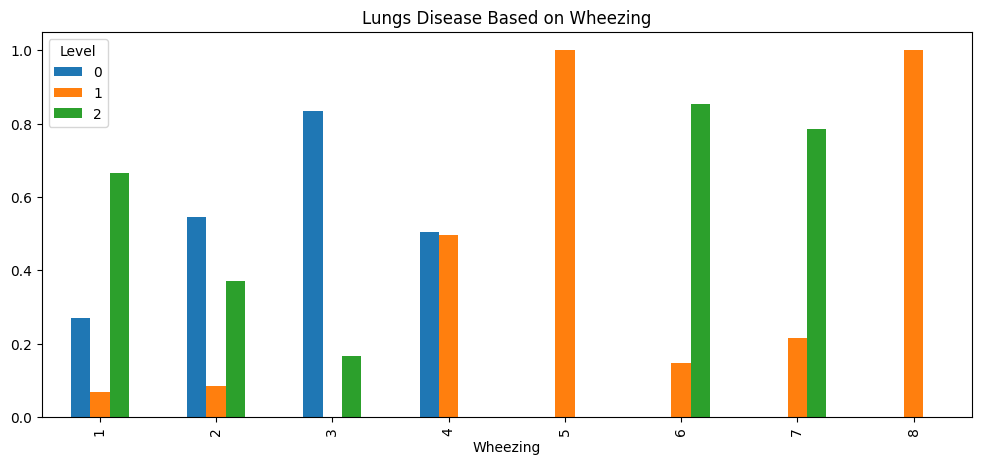

In [ ]:
occ_cht('Wheezing')

<Axes: title={'center': 'Lungs Disease Based on Swallowing Difficulty'}, xlabel='Swallowing Difficulty'>

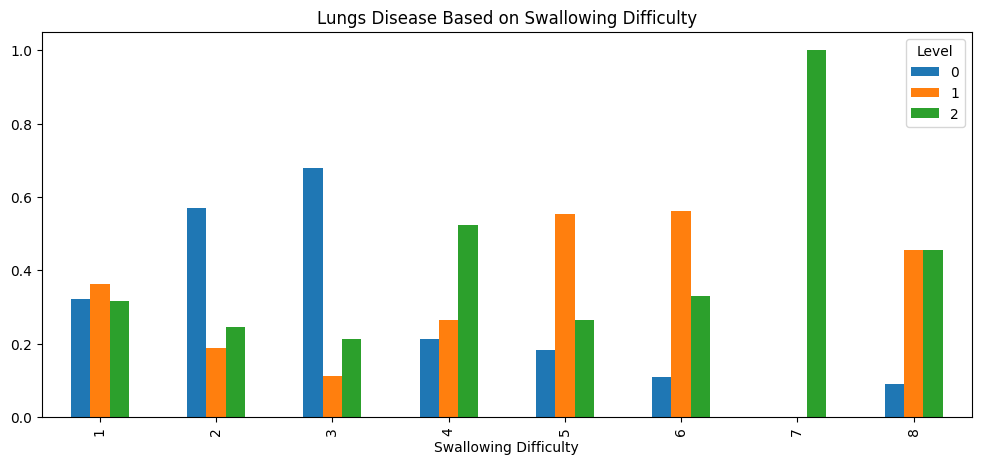

In [ ]:
occ_cht('Swallowing Difficulty')

<Axes: title={'center': 'Lungs Disease Based on Clubbing of Finger Nails'}, xlabel='Clubbing of Finger Nails'>

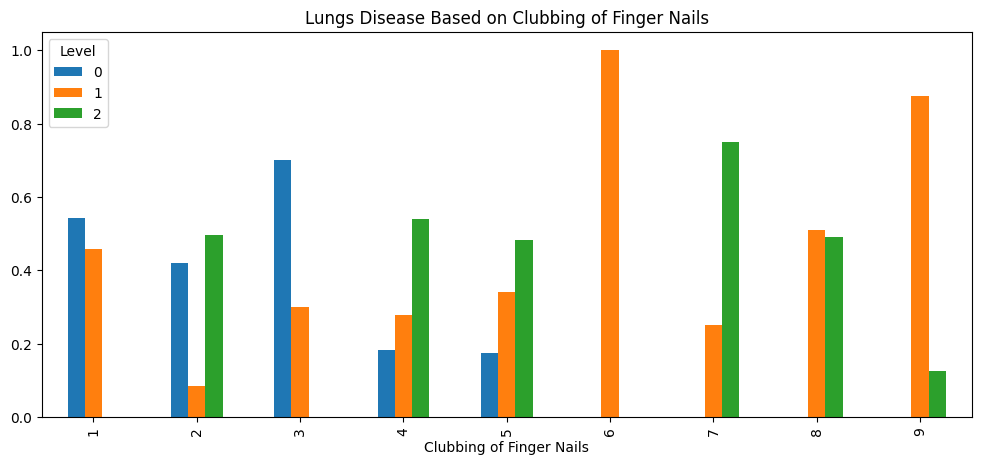

In [ ]:
occ_cht('Clubbing of Finger Nails')

<Axes: title={'center': 'Lungs Disease Based on Frequent Cold'}, xlabel='Frequent Cold'>

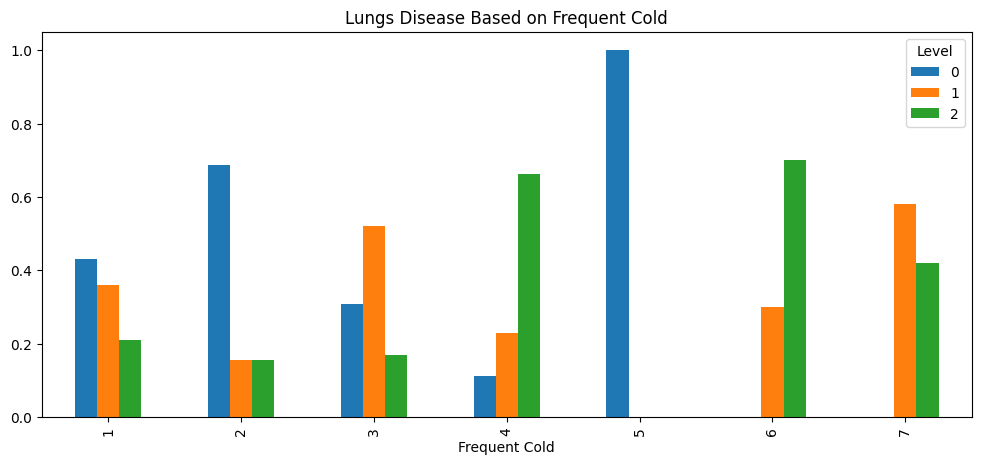

In [ ]:
occ_cht('Frequent Cold')

<Axes: title={'center': 'Lungs Disease Based on Dry Cough'}, xlabel='Dry Cough'>

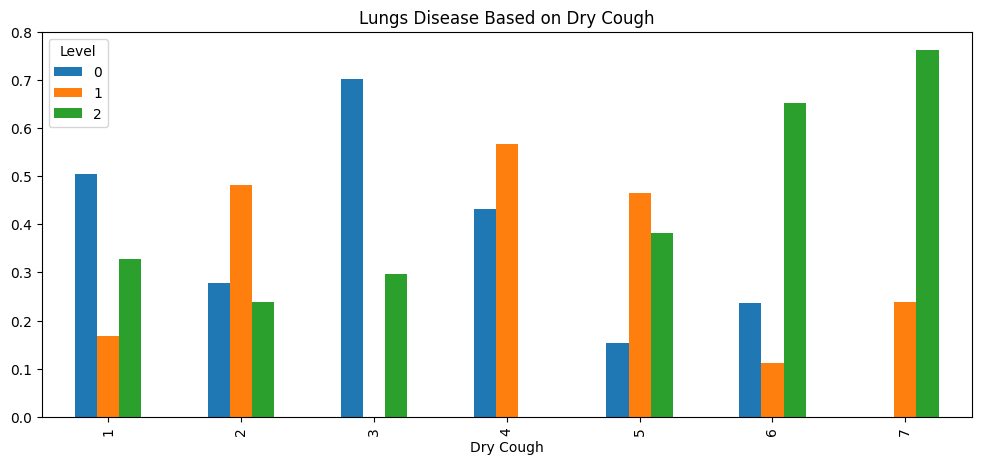

In [ ]:
occ_cht('Dry Cough')

<Axes: title={'center': 'Lungs Disease Based on Snoring'}, xlabel='Snoring'>

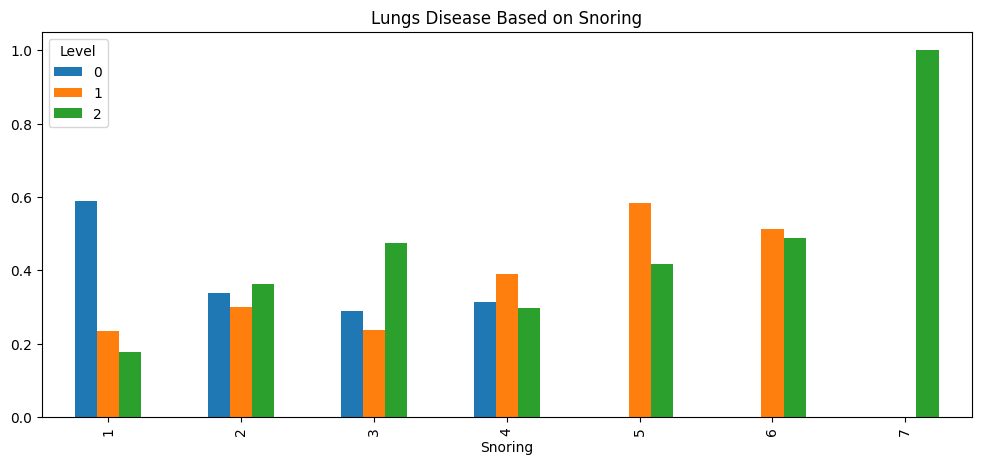

In [ ]:
occ_cht('Snoring')

**3.3 Heat Map**

<Axes: >

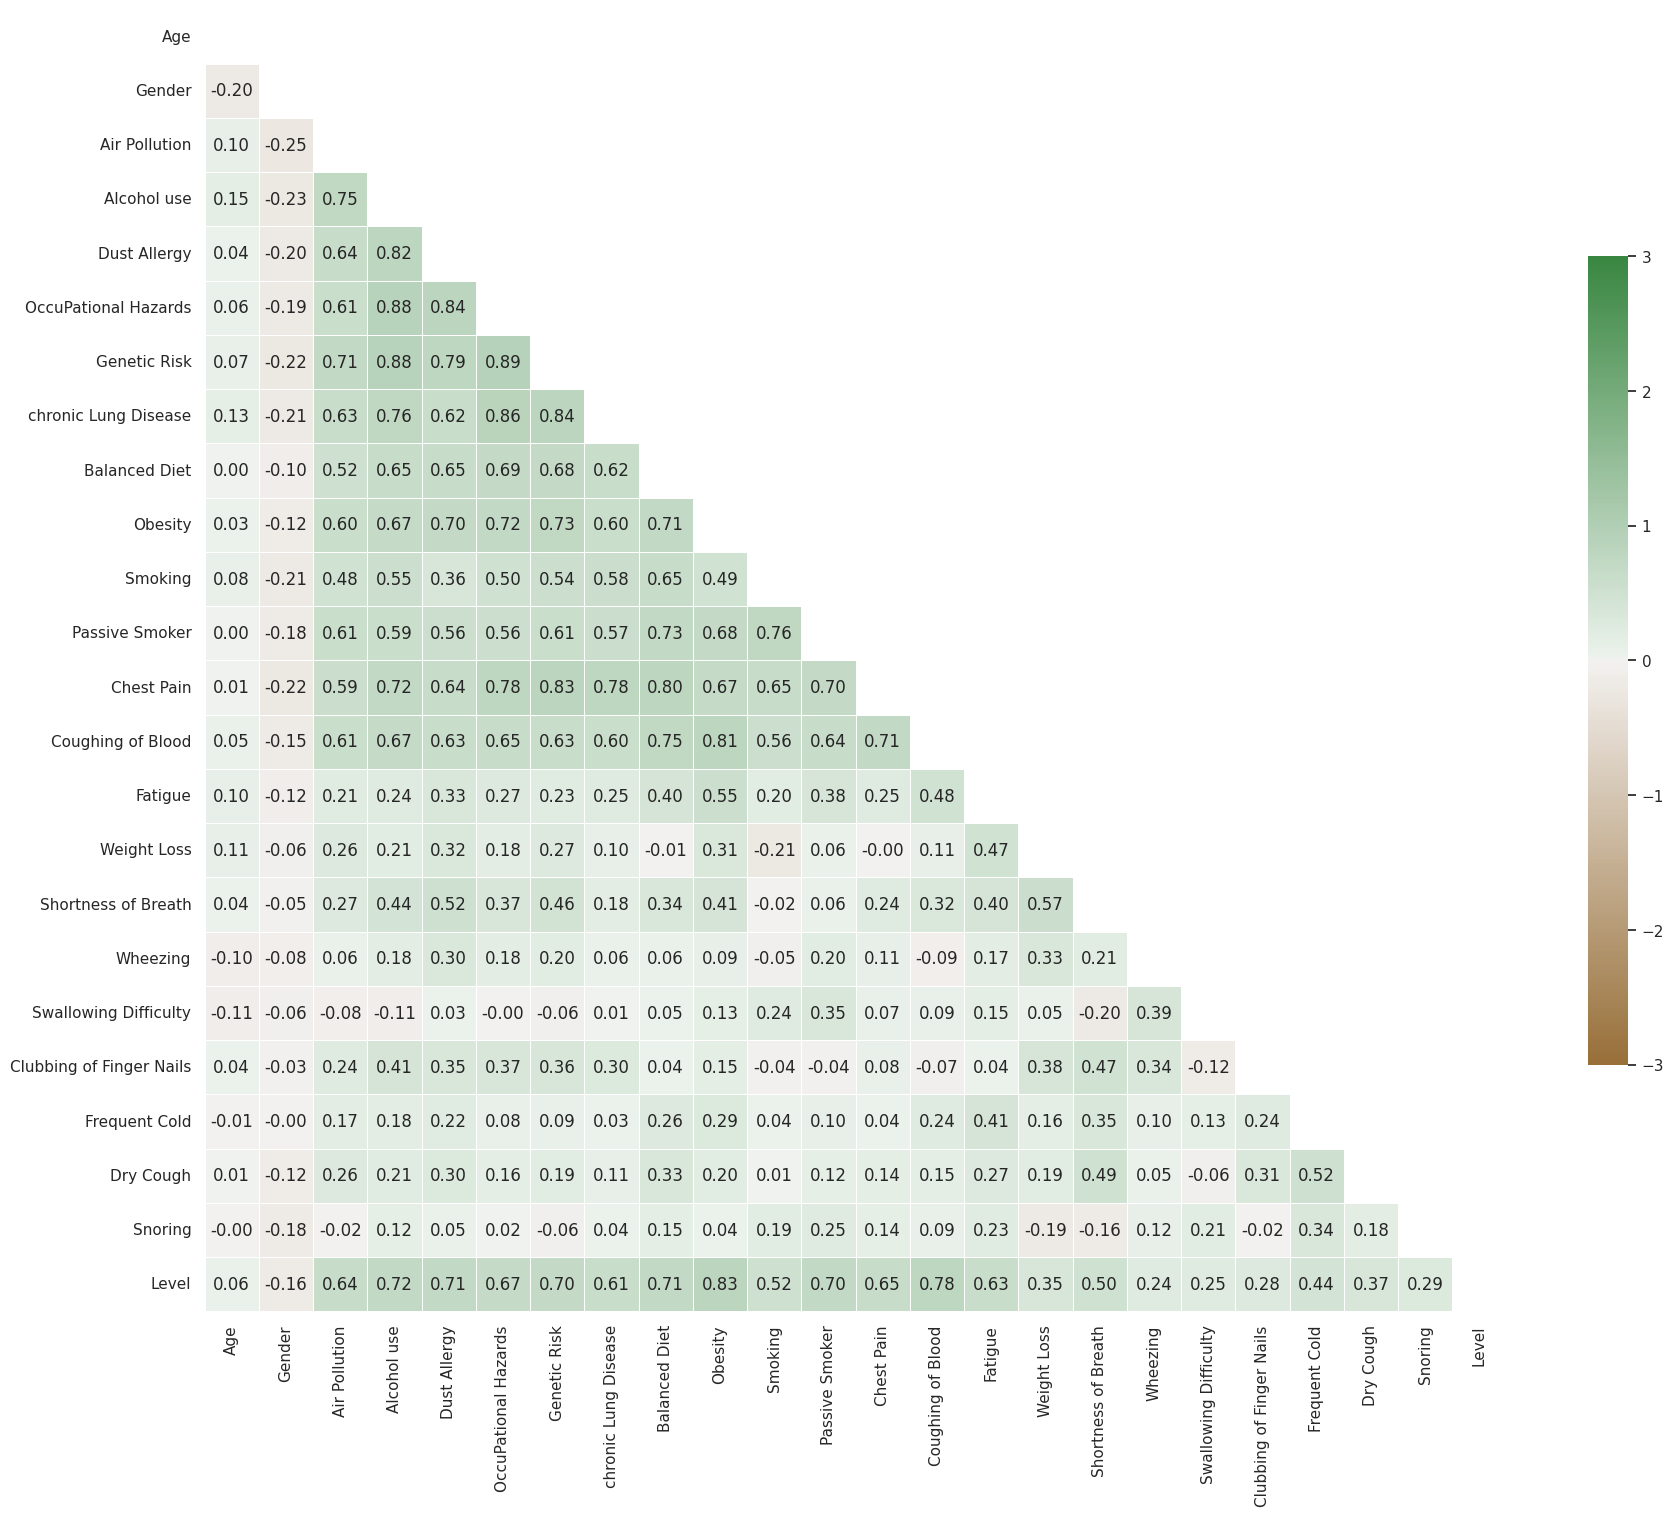

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 21))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(50, 130, n = 7, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt= ".2f", cmap=cmap, vmin=-3, vmax=3, center=0, square=True, linewidths=.7, cbar_kws={"shrink": .5})

#**4. Model Selection and Evaluation**

In [ ]:
#declaration of header files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import r2_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import metrics

In [ ]:
!pip install catboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


**4.1 Split features and target datas from dataFrame**

In [ ]:
#declare independent variables in 'x' & dependent variable in 'y'

X = df.drop('Level', axis=1)
y = df['Level']

**4.2 Splitting data into train and test sets**

In [ ]:
#spliting 80% datas as train data(X_train, y_train) & 20% datas as test data(X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of Independent variables - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shape of dependent variable - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')
print(f'\nTesting output counts\n{y_test.value_counts()}')

Shape of Independent variables - X Training: (800, 23) and X Testing (200, 23)
Shape of dependent variable - Y Training: (800,) and Y Testing (200,)

Training output counts
Level
2    283
1    269
0    248
Name: count, dtype: int64

Testing output counts
Level
2    82
1    63
0    55
Name: count, dtype: int64


**4.3 Feature scaling**

In [ ]:
#Data preprocesing
scaler = StandardScaler()
X_train_stdscr = scaler.fit_transform(X_train)
X_test_stdscr = scaler.transform(X_test)

In [ ]:
# Model Accuracies
mdl_accuracies = dict()

**4.4 Define a list of models**

In [ ]:
models = {

    "Logistic Regression": (LogisticRegression(), {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    }),

    "kNN":  (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),


    "SVM": (SVC(probability=True), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),

     "Decision Tree": (DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),

    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),


     "XGBoost":(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }),


     'CatBoost': (CatBoostClassifier(verbose=0), {
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'iterations': [100, 500, 1000]
    })

}

**4.5 Evaluation class declaration**

In [ ]:
#Function to evaluate the model
def evaluate_model_1(name, model, param_grid, X_train, X_test, y_train, y_test):
    mdl = model.fit(X_train, y_train)
    y_pred  = mdl.predict(X_test)
    y_prob = mdl.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,  average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')

    roc_scr = roc_auc_score(y_test, mdl.predict_proba(X_test), multi_class='ovr')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
    auc = metrics.auc(fpr, tpr)
    r2 = r2_score(y_test, y_pred)

    mdl_accuracies[name] = accuracy_score(y_test, y_pred)

    print(f"\nModel Name : {name}\n")
    print(f"\t Accuracy : {(accuracy)}\t ROC_AUC_Score : {roc_scr}\t AUC: {auc}\t  R2_Score : {(r2)}\n")
    print(f"\t Precision : {(precision)}\t F1 Score : {f1}\t Recall: {recall}\n")

    print(classification_report(y_test, y_pred))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.show()
    print("__________________________________________________________________")

In [ ]:
def evaluate_model_2(name, model, param_grid, X_train, X_test, y_train, y_test):
    mdl = model.fit(X_train, y_train)
    y_prob = mdl.predict_proba(X_test)[:, 1]

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=2)
    auc1 = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = auc1)')


Model Name : Logistic Regression

	 Accuracy : 0.995	 ROC_AUC_Score : 1.0	 AUC: 1.0	  R2_Score : 0.9925012185519853

	 Precision : 0.995	 F1 Score : 0.995	 Recall: 0.995

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.98      1.00      0.99        63
           2       1.00      1.00      1.00        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



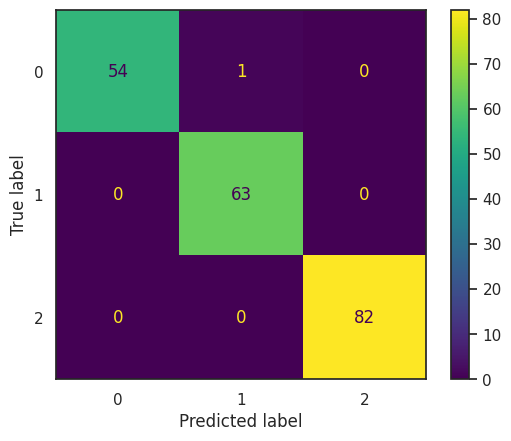

__________________________________________________________________

Model Name : kNN

	 Accuracy : 0.995	 ROC_AUC_Score : 1.0	 AUC: 1.0	  R2_Score : 0.9925012185519853

	 Precision : 0.995	 F1 Score : 0.995	 Recall: 0.995

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.98      1.00      0.99        63
           2       1.00      1.00      1.00        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



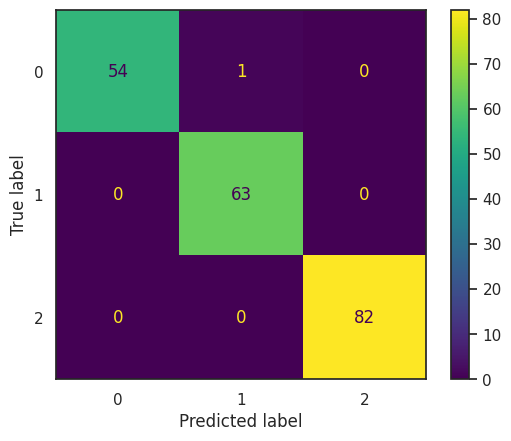

__________________________________________________________________

Model Name : SVM

	 Accuracy : 0.965	 ROC_AUC_Score : 0.9879436896502086	 AUC: 0.9957627118644068	  R2_Score : 0.9475085298638971

	 Precision : 0.965	 F1 Score : 0.965	 Recall: 0.965

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        55
           1       0.91      0.98      0.95        63
           2       0.99      1.00      0.99        82

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



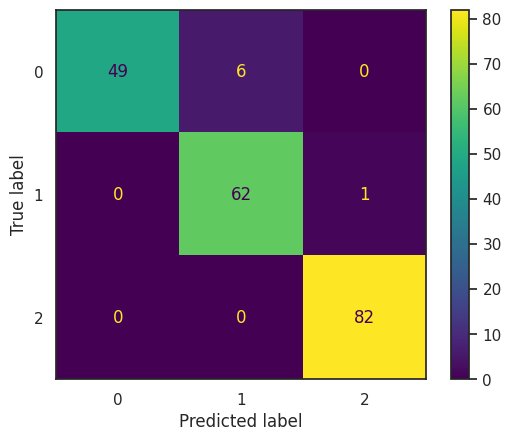

__________________________________________________________________

Model Name : Decision Tree

	 Accuracy : 1.0	 ROC_AUC_Score : 1.0	 AUC: 1.0	  R2_Score : 1.0

	 Precision : 1.0	 F1 Score : 1.0	 Recall: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



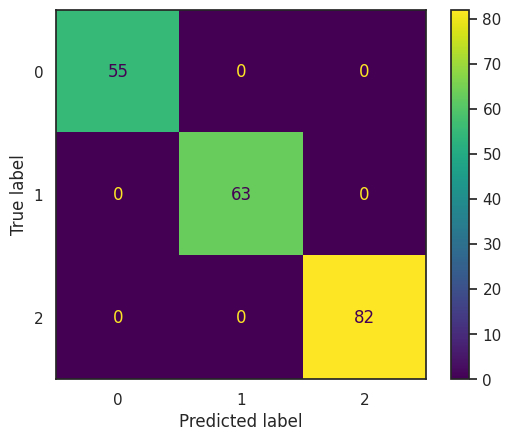

__________________________________________________________________

Model Name : Random Forest

	 Accuracy : 1.0	 ROC_AUC_Score : 1.0	 AUC: 1.0	  R2_Score : 1.0

	 Precision : 1.0	 F1 Score : 1.0	 Recall: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



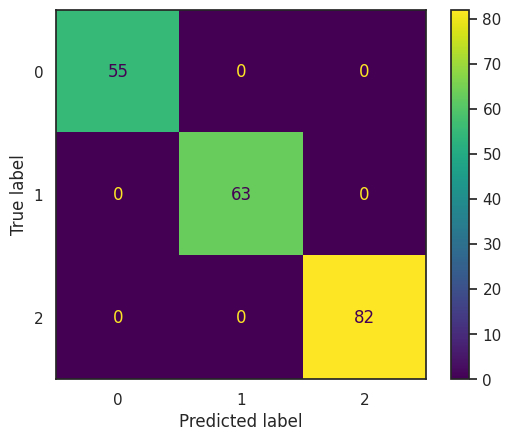

__________________________________________________________________

Model Name : XGBoost

	 Accuracy : 1.0	 ROC_AUC_Score : 1.0	 AUC: 1.0	  R2_Score : 1.0

	 Precision : 1.0	 F1 Score : 1.0	 Recall: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



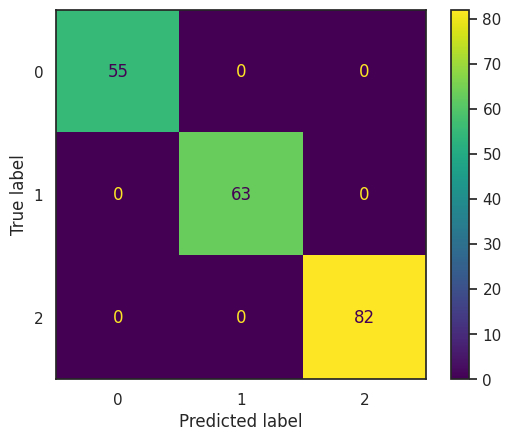

__________________________________________________________________

Model Name : CatBoost

	 Accuracy : 1.0	 ROC_AUC_Score : 1.0	 AUC: 1.0	  R2_Score : 1.0

	 Precision : 1.0	 F1 Score : 1.0	 Recall: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



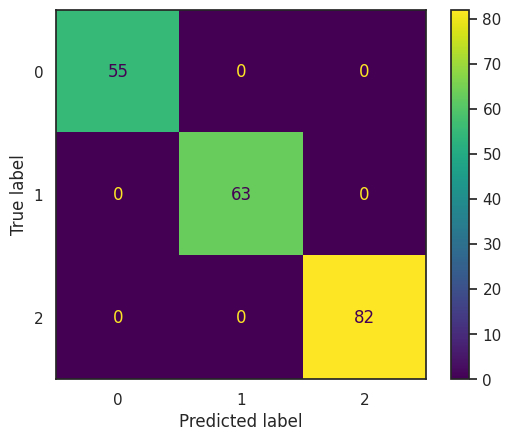

__________________________________________________________________


In [ ]:
for name, (model, param_grid) in models.items():
    evaluate_model_1(name, model, param_grid, X_train, X_test, y_train, y_test)

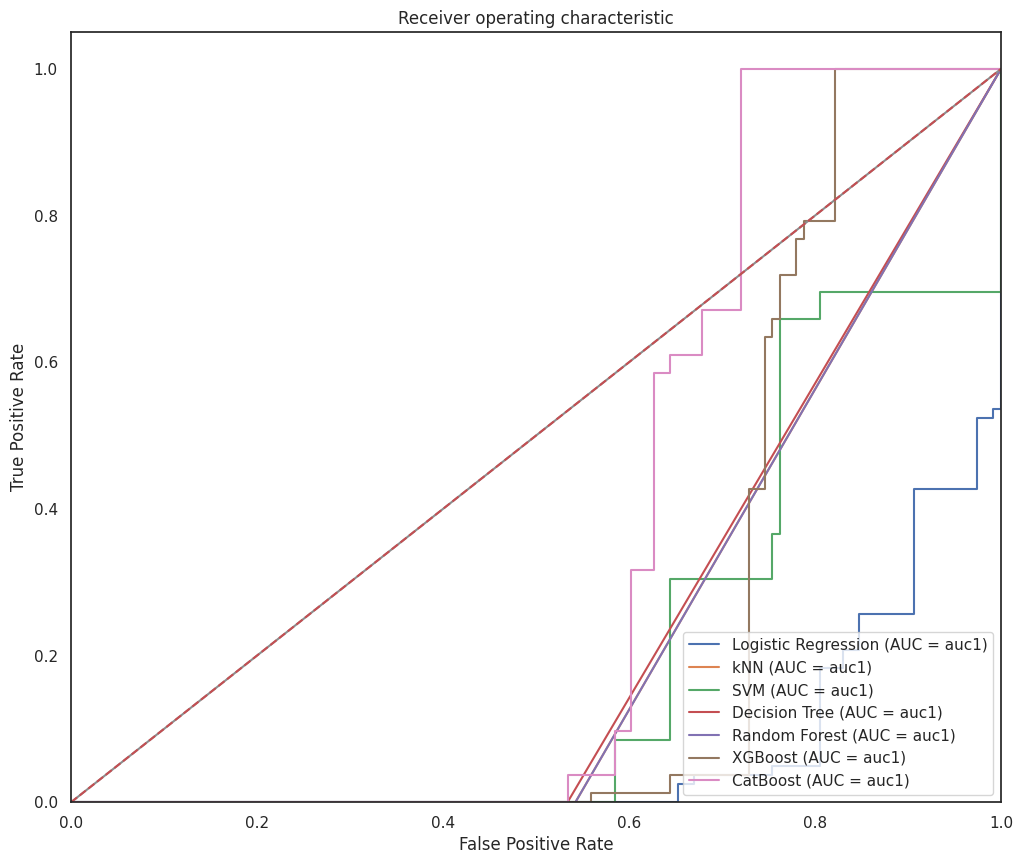

In [ ]:
plt.figure(figsize=(12, 10))

for name, (model, param_grid) in models.items():
    evaluate_model_2(name, model, param_grid, X_train, X_test, y_train, y_test)

plt.plot([0, 1], [0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

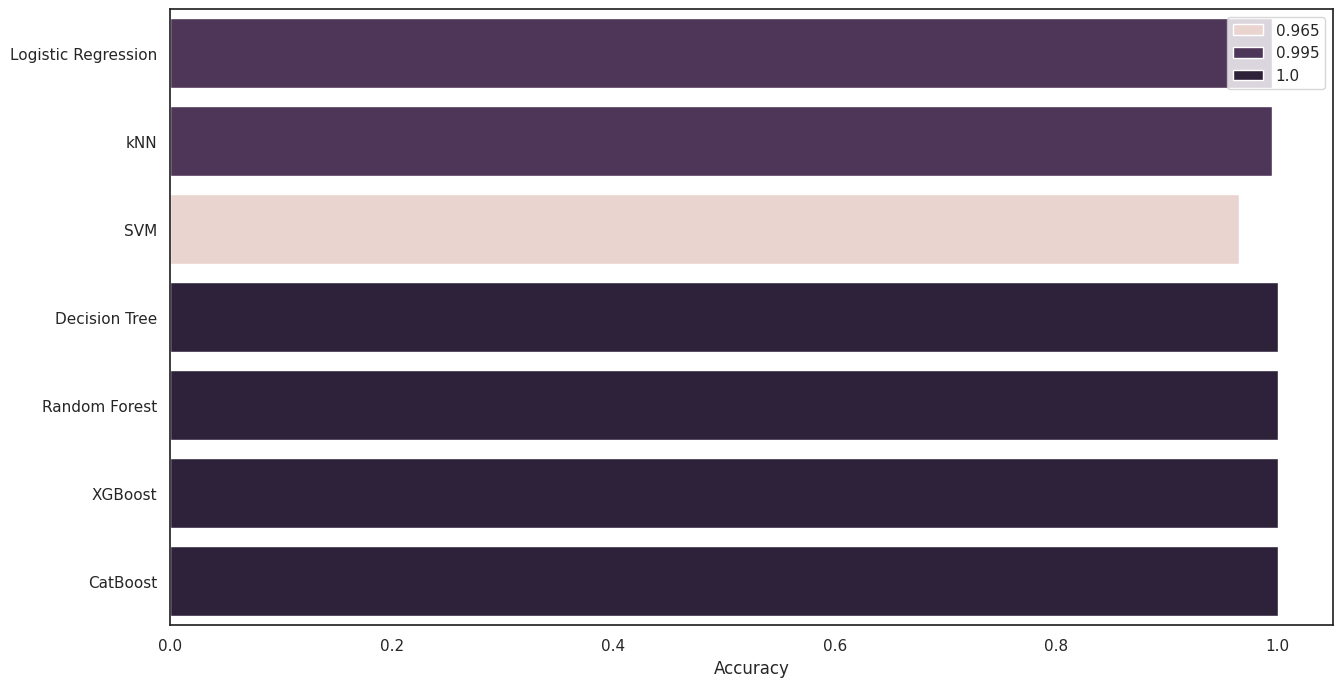

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(
    x=list(mdl_accuracies.values()),
    y=list(mdl_accuracies.keys()),
    hue=list(mdl_accuracies.values()),
    estimator="sum"
)
plt.xlabel('Accuracy')
plt.show()